In [26]:
!pip install ucimlrepo

Import da Base Dados para o Exercicio 1

In [27]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
communities_and_crime = fetch_ucirepo(id=183)

# data (as pandas dataframes)
X = communities_and_crime.data.features
y = communities_and_crime.data.targets

# metadata
print(communities_and_crime.metadata)

# variable information
print(communities_and_crime.variables)




{'uci_id': 183, 'name': 'Communities and Crime', 'repository_url': 'https://archive.ics.uci.edu/dataset/183/communities+and+crime', 'data_url': 'https://archive.ics.uci.edu/static/public/183/data.csv', 'abstract': 'Communities within the United States. The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1994, 'num_features': 127, 'feature_types': ['Real'], 'demographics': ['Race', 'Age', 'Income', 'Occupation'], 'target_col': ['ViolentCrimesPerPop'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2002, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C53W3X', 'creators': ['Michael Redmond'], 'intro_paper': {'ID': 405, 'type': 'NATIVE', 'title': 'A data-driven software tool for enabling cooperative information s

Pré-processamento dos dados, treinamento de um modelo de regressão linear e avaliação do modelo.

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Concatenar as variáveis independentes e a variável alvo
df = pd.concat([X, y], axis=1)

# Identificar as colunas com valores faltantes
colunas_com_faltantes = df.columns[df.isnull().any()].tolist()

# Estratégias para lidar com valores faltantes (escolha uma ou combine):

# 1. Remover linhas com valores faltantes (simples, mas perde dados)
# df_limpo = df.dropna()

# 2. Imputação usando a média para variáveis numéricas
colunas_numericas = df.select_dtypes(include=['number']).columns
imputador = SimpleImputer(strategy='mean')  # Usar média, mediana ou mais_frequente
df[colunas_numericas] = imputador.fit_transform(df[colunas_numericas])

# Separar variáveis independentes (X) e variável alvo (y) após lidar com dados faltantes
X = df.drop('ViolentCrimesPerPop', axis=1)
y = df['ViolentCrimesPerPop']

# Converter colunas não numéricas para numéricas (usando codificação one-hot)
X = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns)

# Dividir os dados em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Fazer previsões no conjunto de teste
y_predito = modelo.predict(X_teste)

# Avaliar o modelo
mse = mean_squared_error(y_teste, y_predito)
print(f"MSE: {mse}")


MSE: 0.04115934097282996


Calculo das métricas RMSE e MAE para avaliar a performance do modelo de regressão linear.

In [29]:
from sklearn.metrics import mean_absolute_error

# Prever no conjunto de treinamento
y_treino_pred = modelo.predict(X_treino)

# Calcular RMSE e MAE para o conjunto de treinamento
rmse_treino = mean_squared_error(y_treino, y_treino_pred, squared=False)  # squared=False para RMSE
mae_treino = mean_absolute_error(y_treino, y_treino_pred)

print(f"RMSE do Treinamento: {rmse_treino}")
print(f"MAE do Treinamento: {mae_treino}")

# Calcular RMSE e MAE para o conjunto de teste (MSE já calculado acima)
rmse_teste = mean_squared_error(y_teste, y_predito, squared=False)
mae_teste = mean_absolute_error(y_teste, y_predito)

print(f"RMSE do Teste: {rmse_teste}")
print(f"MAE do Teste: {mae_teste}")


RMSE do Treinamento: 3.631509133398197e-14
MAE do Treinamento: 2.6853674849292657e-14
RMSE do Teste: 0.20287765025460533
MAE do Teste: 0.15225020423361518


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Aplicação do PCA

Razão da Variância Explicada: [0.01549441 0.00796321 0.00602183 0.00504009 0.00468312]


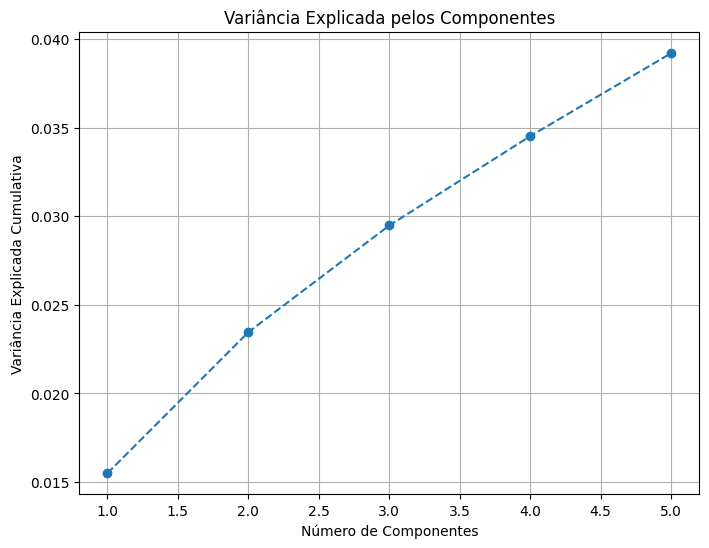

PCA - RMSE (Treinamento): 0.17033635892417368
PCA - MAE (Treinamento): 0.12156417874958289
PCA - RMSE (Teste): 0.1543374816081
PCA - MAE (Teste): 0.11521812277389924
Regressão Polinomial - RMSE (Treinamento): 0.15547890820283228
Regressão Polinomial - MAE (Treinamento): 0.11067377111437156
Regressão Polinomial - RMSE (Teste): 0.14567537480215043
Regressão Polinomial - MAE (Teste): 0.1051326661032178


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [30]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

# Normalização das variáveis
escalador = StandardScaler()
X_treino_escalado = escalador.fit_transform(X_treino)
X_teste_escalado = escalador.transform(X_teste)

# Aplicar PCA
pca = PCA(n_components=5)
X_treino_pca = pca.fit_transform(X_treino_escalado)
X_teste_pca = pca.transform(X_teste_escalado)

# Razão da variância explicada
variancia_explicada = pca.explained_variance_ratio_
print(f"Razão da Variância Explicada: {variancia_explicada}")

# Plotar a variância explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), variancia_explicada.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.title('Variância Explicada pelos Componentes')
plt.grid(True)
plt.show()

# Treinar o modelo de regressão linear com PCA
modelo_pca = LinearRegression()
modelo_pca.fit(X_treino_pca, y_treino)

# Previsões e avaliação
y_pred_treino_pca = modelo_pca.predict(X_treino_pca)
y_pred_teste_pca = modelo_pca.predict(X_teste_pca)

rmse_treino_pca = mean_squared_error(y_treino, y_pred_treino_pca, squared=False)
mae_treino_pca = mean_absolute_error(y_treino, y_pred_treino_pca)
rmse_teste_pca = mean_squared_error(y_teste, y_pred_teste_pca, squared=False)
mae_teste_pca = mean_absolute_error(y_teste, y_pred_teste_pca)

print(f"PCA - RMSE (Treinamento): {rmse_treino_pca}")
print(f"PCA - MAE (Treinamento): {mae_treino_pca}")
print(f"PCA - RMSE (Teste): {rmse_teste_pca}")
print(f"PCA - MAE (Teste): {mae_teste_pca}")

# Regressão Polinomial
polinomio = PolynomialFeatures(degree=2)  # Exemplo com grau 2
X_treino_poli = polinomio.fit_transform(X_treino_pca)
X_teste_poli = polinomio.transform(X_teste_pca)

modelo_poli = LinearRegression()
modelo_poli.fit(X_treino_poli, y_treino)
y_pred_treino_poli = modelo_poli.predict(X_treino_poli)
y_pred_teste_poli = modelo_poli.predict(X_teste_poli)

rmse_treino_poli = mean_squared_error(y_treino, y_pred_treino_poli, squared=False)
mae_treino_poli = mean_absolute_error(y_treino, y_pred_treino_poli)
rmse_teste_poli = mean_squared_error(y_teste, y_pred_teste_poli, squared=False)
mae_teste_poli = mean_absolute_error(y_teste, y_pred_teste_poli)

print(f"Regressão Polinomial - RMSE (Treinamento): {rmse_treino_poli}")
print(f"Regressão Polinomial - MAE (Treinamento): {mae_treino_poli}")
print(f"Regressão Polinomial - RMSE (Teste): {rmse_teste_poli}")
print(f"Regressão Polinomial - MAE (Teste): {mae_teste_poli}")


In [31]:
from ucimlrepo import fetch_ucirepo

# obter conjunto de dados
htru2 = fetch_ucirepo(id=372)

# dados (como dataframes do pandas)
X = htru2.data.features
y = htru2.data.targets

# metadados
print(htru2.metadata)

# informações das variáveis
print(htru2.variables)


{'uci_id': 372, 'name': 'HTRU2', 'repository_url': 'https://archive.ics.uci.edu/dataset/372/htru2', 'data_url': 'https://archive.ics.uci.edu/static/public/372/data.csv', 'abstract': 'Pulsar candidates collected during the HTRU survey. Pulsars are a type of star, of considerable scientific interest. Candidates must be classified in to pulsar and non-pulsar classes to aid discovery.', 'area': 'Physics and Chemistry', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 17898, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Wed Apr 03 2024', 'dataset_doi': '10.24432/C5DK6R', 'creators': ['Robert Lyon'], 'intro_paper': {'ID': 460, 'type': 'NATIVE', 'title': 'Fifty years of pulsar candidate selection: from simple filters to a new principled real-time classification approach', 'a

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
import time

# transformando y em vetor 1D
y = np.ravel(y)

# lista para armazenar os resultados
resultados = []

# loop para realizar múltiplas execuções com diferentes valores de random_state
for i in range(5):
    # dividindo os dados em treino e teste
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=6000, random_state=i)

    # valores de k para o classificador KNN
    valores_k = [3, 5, 7, 9, 11]
    for k in valores_k:
        # registrando o tempo de início
        tempo_inicio = time.time()
        # criando o classificador KNN com o valor de k
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        # dividindo os dados de treino para validação
        X_treino_split, X_val, y_treino_split, y_val = train_test_split(X_treino, y_treino, test_size=0.5, random_state=i)

        # treinando o modelo com os dados de treino
        knn.fit(X_treino_split, y_treino_split)
        # fazendo a predição nos dados de validação
        y_pred_val = knn.predict(X_val)

        # treinando o modelo com todos os dados de treino
        knn.fit(X_treino, y_treino)
        # fazendo a predição nos dados de teste
        y_pred_teste = knn.predict(X_teste)

        # registrando o tempo de fim
        tempo_fim = time.time()

        # calculando as métricas de avaliação
        acuracia = accuracy_score(y_teste, y_pred_teste)
        revocacao = recall_score(y_teste, y_pred_teste)
        precisao = precision_score(y_teste, y_pred_teste)

        # armazenando os resultados
        resultados.append([k, acuracia, revocacao, precisao, tempo_fim - tempo_inicio, len(knn.classes_)])

# criando um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados, columns=["k", "Acurácia", "Revocação", "Precisão", "Tempo", "Prototipos"])
# exibindo a média dos resultados por valor de k
print(resultados_df.groupby('k').mean())


    Acurácia  Revocação  Precisão     Tempo  Prototipos
k                                                      
3   0.971004   0.776225  0.890707  1.975095         2.0
5   0.971962   0.769735  0.907675  1.783201         2.0
7   0.972802   0.768264  0.919217  1.325606         2.0
9   0.972836   0.767516  0.920315  1.196173         2.0
11  0.972735   0.765274  0.921341  1.106156         2.0


In [ ]:
from ucimlrepo import fetch_ucirepo

nursery = fetch_ucirepo(id=76)

X = nursery.data.features
y = nursery.data.targets

print(nursery.metadata)

print(nursery.variables)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random

# Assumindo que X e y já estão definidos a partir do código anterior (conjunto de dados Nursery)

# Amostrando 10000 pontos de dados para treinamento
random.seed(42) # Definindo a semente para reprodutibilidade
indices_amostra = random.sample(range(len(X)), 10000)
X_treino = X.iloc[indices_amostra]
y_treino = y.iloc[indices_amostra]

# Dados restantes para teste
X_teste = X.drop(index=indices_amostra)
y_teste = y.drop(index=indices_amostra)

# Converter variáveis categóricas para numéricas usando one-hot encoding
X_treino = pd.get_dummies(X_treino, columns=X_treino.select_dtypes(include=['object']).columns)
X_teste = pd.get_dummies(X_teste, columns=X_teste.select_dtypes(include=['object']).columns)

# Garantir que tanto os conjuntos de treino quanto de teste tenham as mesmas colunas após o one-hot encoding
for col in X_treino.columns:
    if col not in X_teste.columns:
        X_teste[col] = 0
for col in X_teste.columns:
    if col not in X_treino.columns:
        X_treino[col] = 0

# Alinhar as colunas para consistência
X_treino, X_teste = X_treino.align(X_teste, axis=1, join='inner')

# Construir uma árvore de decisão com profundidade máxima=2 (dois níveis de nós de decisão)
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_treino, y_treino)

# Imprimir a estrutura da árvore (Você pode usar outras bibliotecas de visualização para uma melhor visualização)
# print(clf.tree_) # Esta é uma representação de baixo nível, para depuração.

# Avaliar o modelo no conjunto de teste
y_pred = clf.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
print(f"Acurácia: {acuracia}")

# Extrair as regras de decisão (representação simplificada)
def obter_regras(árvore, nomes_features, nomes_classes):
    regras = []
    def percorrer(no, regra_atual):
        if árvore.children_left[no] == -1:  # Nó folha
            regra = regra_atual + f" => {nomes_classes[np.argmax(árvore.value[no])]} "
            regras.append(regra)
        else:
            feature = nomes_features[árvore.feature[no]]
            threshold = árvore.threshold[no]
            percorrer(árvore.children_left[no], regra_atual + f"{feature} <= {threshold} e ")
            percorrer(árvore.children_right[no], regra_atual + f"{feature} > {threshold} e ")
    percorrer(0, "")
    return regras

# Obter as regras de decisão e imprimir
regras = obter_regras(clf.tree_, X_treino.columns, clf.classes_)
for regra in regras:
    print(regra)
